# Retrievers

A retrievers is a langchain component which fetches relevant documents based on users query.

Type:
1. Data source based

        wikipedia retr

        vectore store retr

        archive retr


2. Search Strategy based(mechanism used to search)

        MMR - maximum marginal relevance

        multi query retr

        contextual compression retr


In [4]:
pip install wikipedia

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11756 sha256=d9e98cddd3e6c3439088bad485f54c34f9db6617209673b76a54e1e586ffcc78
  Stored in directory: c:\users\sathw\appdata\local\pip\cache\wheels\5e\b6\c5\93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_community.retrievers import WikipediaRetriever

In [14]:
retriever = WikipediaRetriever(top_k_results=3, lang="en")

In [18]:
query = "GEopolitical history between india and pakistan"

docs = retriever.invoke(query)

In [19]:
for i,doc in enumerate(docs):
    print("result", i)
    print(doc.page_content)
    print("__________________________________")

result 0
The United States had been providing military aid and economic assistance to Pakistan for various purposes since 1948. Recently U.S. stopped military aid to Pakistan, which was about US$2 billion per year. With U.S. military assistance suspended in 2018 and civilian aid reduced to about $300 million for 2022, Pakistani authorities have turned to other countries for help.


== History ==
From 1947 to 1958, under civilian leadership, the United States provided Pakistan with modest economic aid and limited military assistance. During this period, Pakistan became a member of the South East Asian Treaty Organization (SEATO) and the Central Treaty Organization (CENTO), after a Mutual Defence Assistance Agreement signed in May 1954, which facilitated increased levels of both economic and military aid from the U.S.
In 1958, Ayub Khan led Pakistan's first military coup, becoming Chief Martial Law Administrator (CMLA) and later President until 1969. During his tenure, the U.S. delivered

In [66]:
from langchain_community.vectorstores import Chroma, FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_core.documents import Document

In [22]:
documents = [
    # generate 5 documents with the some content related to various AI topics
    Document(page_content="AI is the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions."),
    Document(page_content="Machine learning is a subset of AI that enables systems to learn and improve from experience without being explicitly programmed."),
    Document(page_content="Natural language processing (NLP) is a field of AI that focuses on the interaction between computers and humans through natural language."),
    Document(page_content="Deep learning is a subset of machine learning that uses neural networks to model and understand complex patterns in data."),
    Document(page_content="Reinforcement learning is an area of machine learning where an agent learns to make decisions by taking actions in an environment to maximize cumulative reward.")
]

In [23]:
embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(documents, embeddings, collection_name="ai_topics")

In [24]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

In [29]:
query = "AI and machine learning"
retriever.invoke(query)


[Document(metadata={}, page_content='AI is the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions.'),
 Document(metadata={}, page_content='Machine learning is a subset of AI that enables systems to learn and improve from experience without being explicitly programmed.')]

In [30]:
vectorstore.similarity_search(query, k=2) 

[Document(metadata={}, page_content='AI is the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions.'),
 Document(metadata={}, page_content='Machine learning is a subset of AI that enables systems to learn and improve from experience without being explicitly programmed.')]

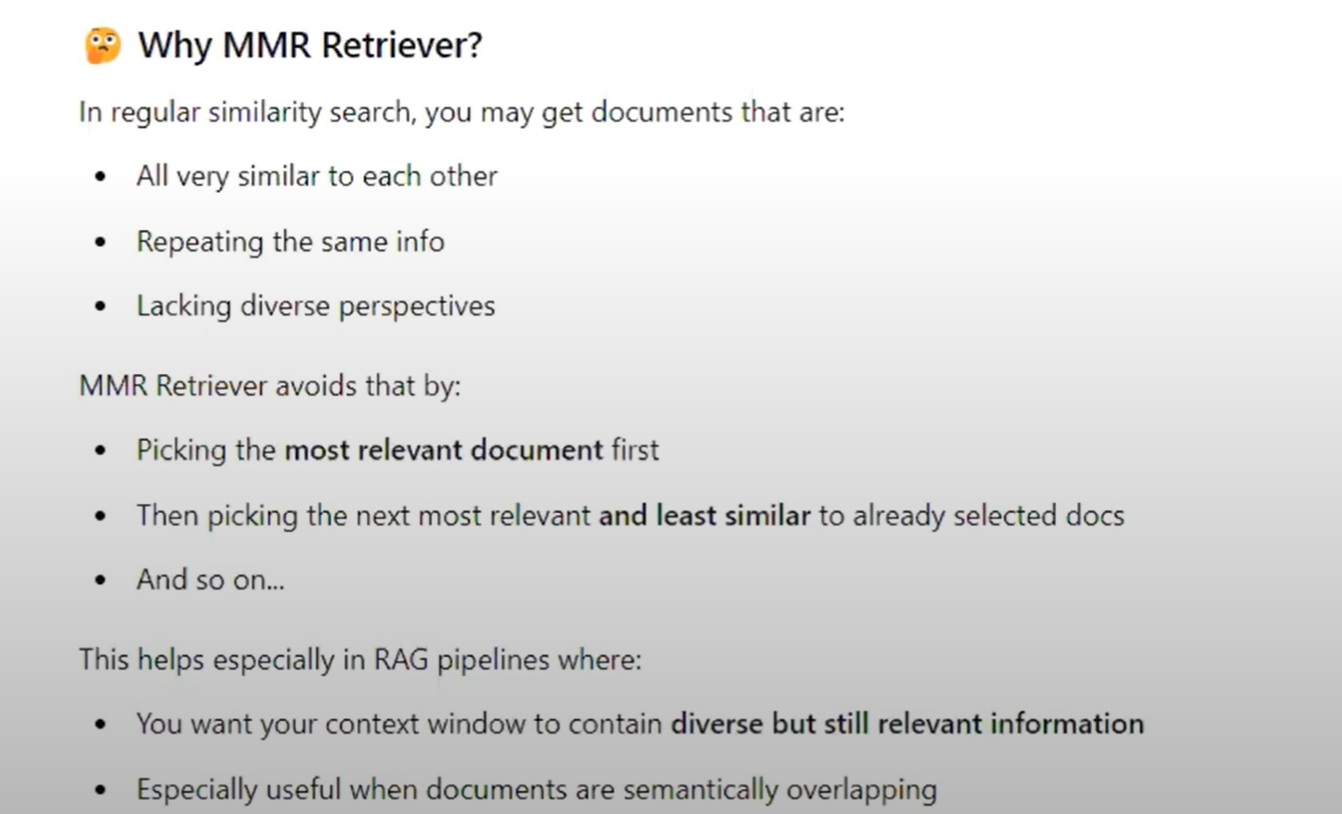

In [39]:
documents = [
    # generate 5 documents related to global warming but 2 of them must be duplicates 
    Document(page_content="Global warming is the long-term heating of Earth's climate system due to human activities, primarily fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth's atmosphere."),
    Document(page_content="Climate change refers to significant changes in global temperatures and weather patterns over time. While climate change is a broader term, global warming specifically refers to the Earth's rising surface temperature."),
    Document(page_content="The greenhouse effect is a natural process that warms the Earth's surface. When the Sun's energy reaches the Earth, some of it is reflected back to space and the rest is absorbed and re-radiated by greenhouse gases."),
    Document(page_content="The greenhouse effect is a natural process that warms the Earth's surface. When the Sun's energy reaches the Earth, some of it is reflected back to space and the rest is absorbed and re-radiated by greenhouse gases."),
    Document(page_content="Climate change refers to significant changes in global temperatures and weather patterns over time. While climate change is a broader term, global warming specifically refers to the Earth's rising surface temperature.")
]

In [40]:
embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(documents, embeddings, collection_name="global_warming")

In [ ]:
retriever = vectorstore.as_retriever(search_type="mmr", search_kwargs={"k": 3, "lambda_mult" : 0.5})



In [44]:
query = "global warming causes"
retriever.invoke(query)

[Document(metadata={}, page_content="Global warming is the long-term heating of Earth's climate system due to human activities, primarily fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth's atmosphere."),
 Document(metadata={}, page_content="Climate change refers to significant changes in global temperatures and weather patterns over time. While climate change is a broader term, global warming specifically refers to the Earth's rising surface temperature."),
 Document(metadata={}, page_content="The greenhouse effect is a natural process that warms the Earth's surface. When the Sun's energy reaches the Earth, some of it is reflected back to space and the rest is absorbed and re-radiated by greenhouse gases.")]

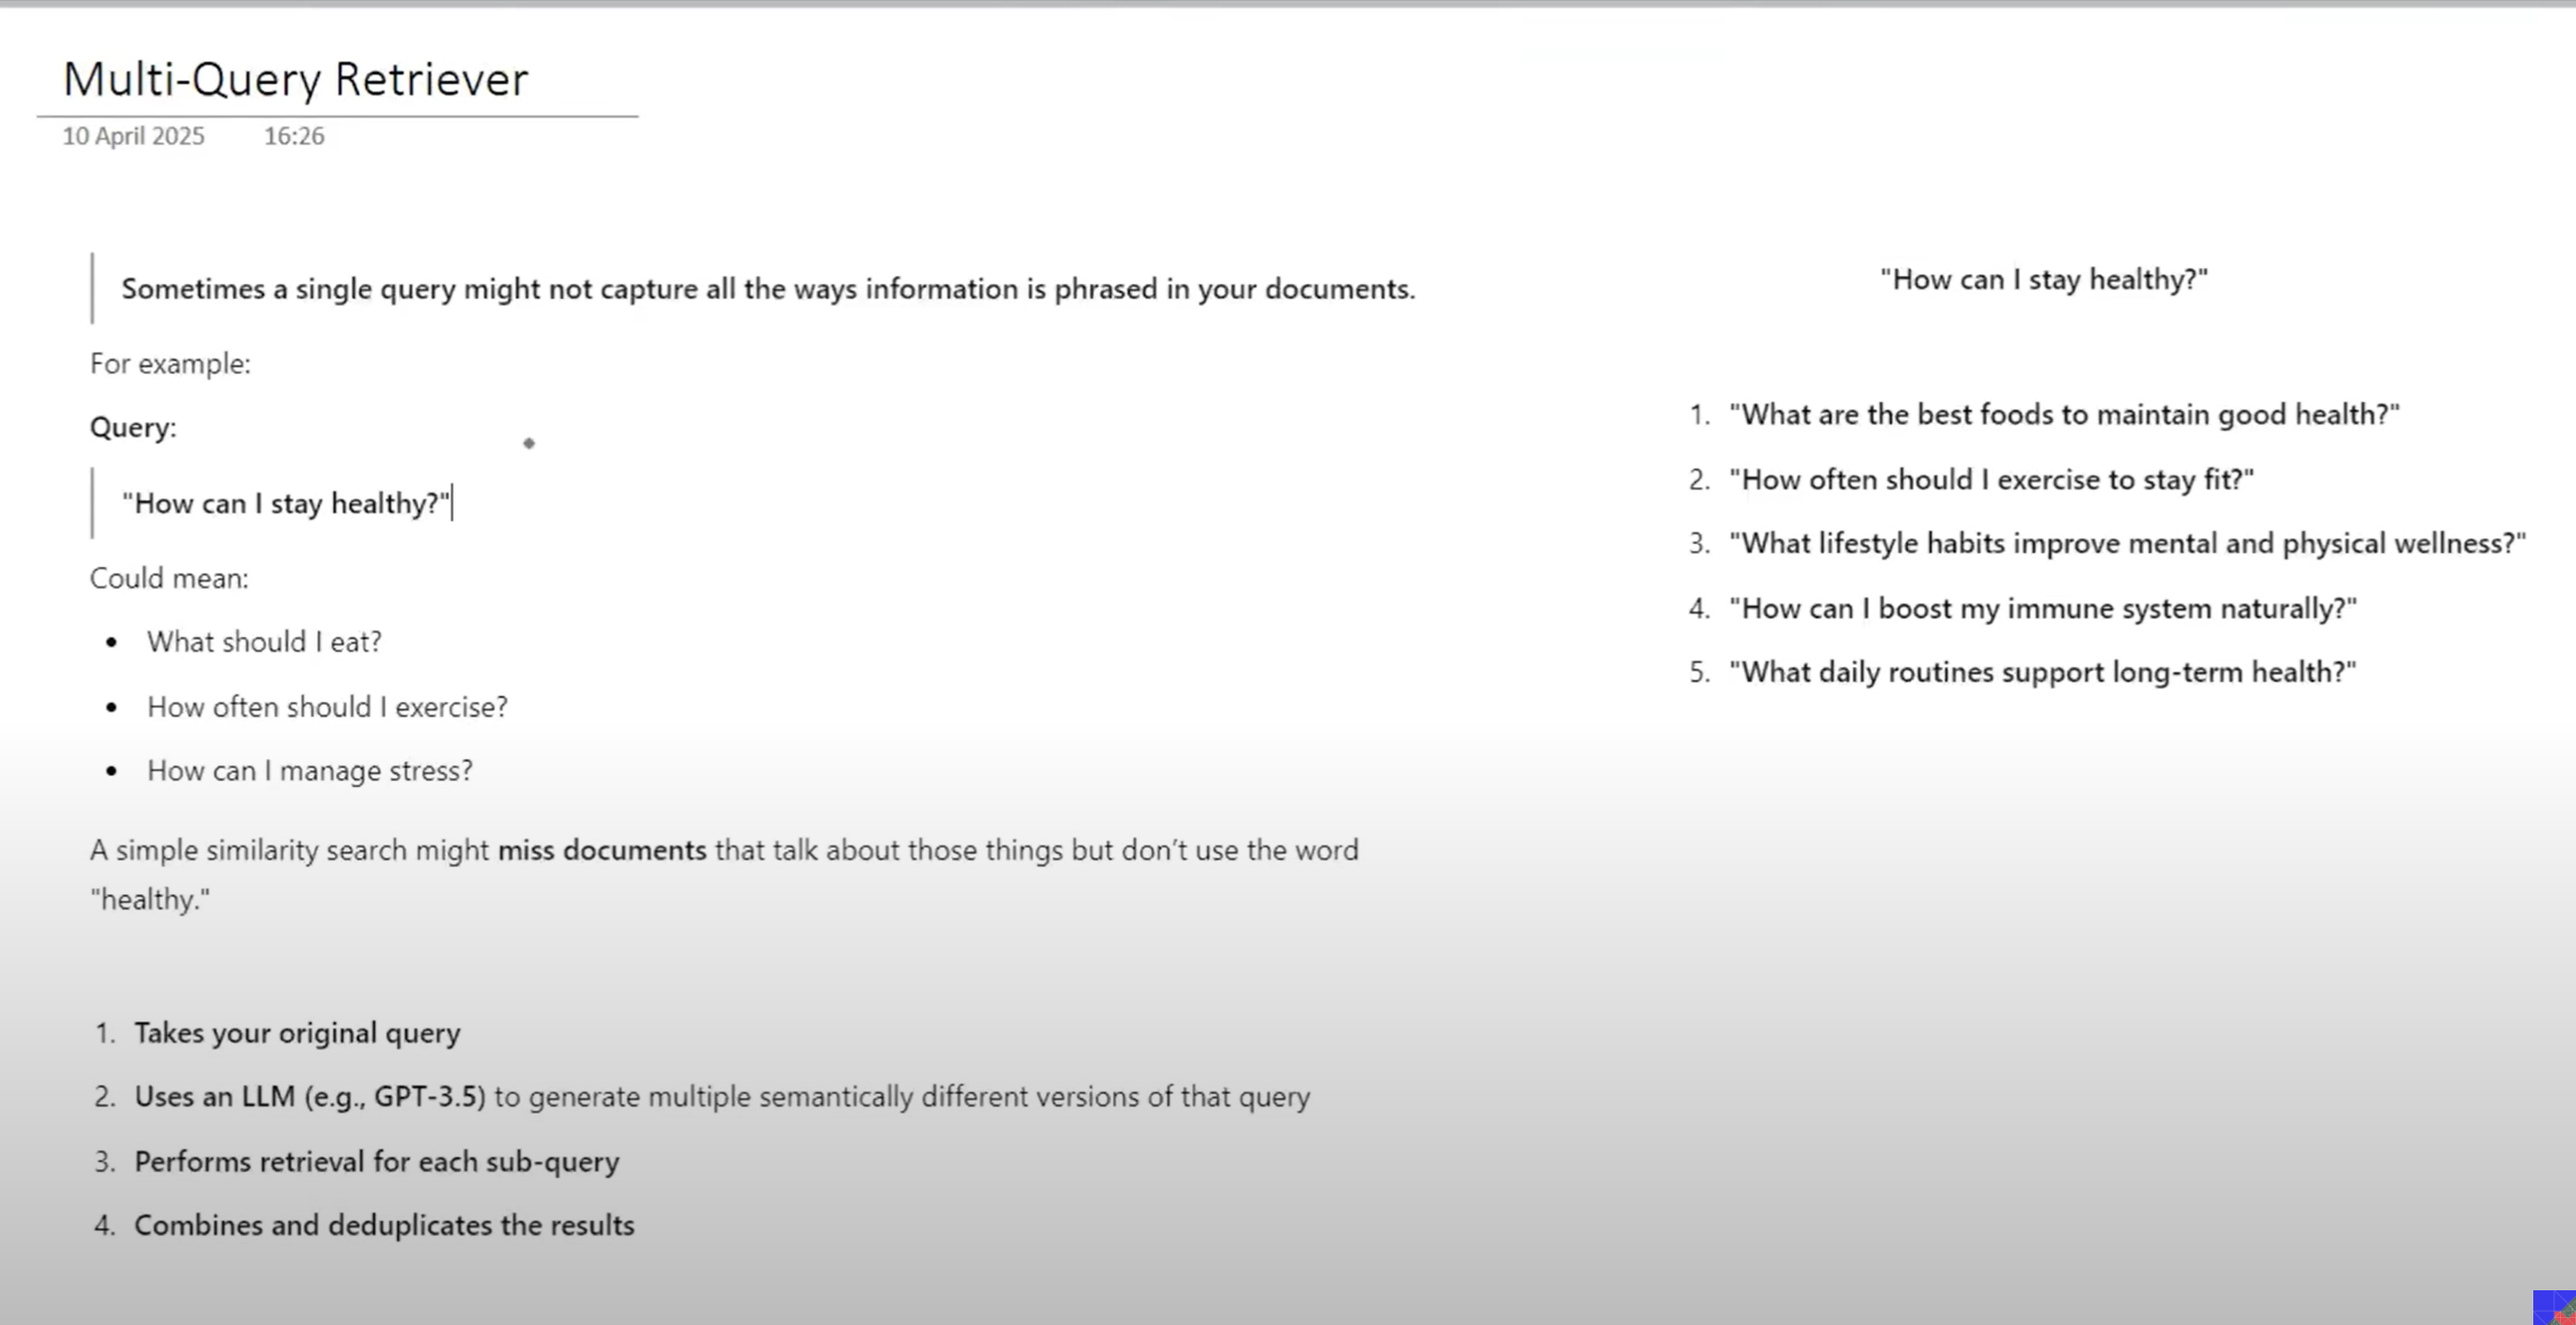

In [49]:
from langchain.retrievers import MultiQueryRetriever
from langchain_openai import ChatOpenAI

In [ ]:
# relevant health and well ness documents
documents = [
    Document(page_content="Health and wellness encompass physical, mental, and social well-being."),
    Document(page_content="Regular exercise is essential for maintaining physical health and wellness."),
    Document(page_content="A balanced diet is crucial for overall health and wellness."),
    Document(page_content="Mental health is just as important as physical health in achieving overall wellness."),
    Document(page_content="Stress management techniques can significantly improve mental health and wellness."),
    Document(page_content="Sleep is a vital component of health and wellness."),
    Document(page_content="Hydration is essential for maintaining health and wellness."),
    Document(page_content="Preventive healthcare measures can enhance health and wellness."),
    Document(page_content="Social connections and relationships play a significant role in health and wellness."),
    Document(page_content="Mindfulness and meditation practices can improve mental health and wellness."),
    Document(page_content="Nutrition education is important for promoting health and wellness."),
    Document(page_content="Health and wellness are interconnected and influence each other."),
    Document(page_content="Chronic diseases can impact overall health and wellness."),
    Document(page_content="Access to healthcare services is crucial for maintaining health and wellness."),
    Document(page_content="Health and wellness programs can promote healthy lifestyles."),
]

In [47]:
embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(documents, embeddings, collection_name="health_and_wellness")

In [48]:
similarity_retriever = vectorstore.as_retriever(search_kwargs={"k": 5})

In [53]:
multi_query_retriever = MultiQueryRetriever.from_llm(
    retriever = vectorstore.as_retriever(search_kwargs={"k": 5}),
    llm = ChatOpenAI(model="gpt-3.5-turbo")
)

In [54]:
query = "How to maintain a healthy lifestyle?"

In [55]:
similarity_retriever.invoke(query)

[Document(metadata={}, page_content='Regular exercise is essential for maintaining physical health and wellness.'),
 Document(metadata={}, page_content='A balanced diet is crucial for overall health and wellness.'),
 Document(metadata={}, page_content='Health and wellness programs can promote healthy lifestyles.'),
 Document(metadata={}, page_content='Health and wellness are interconnected and influence each other.'),
 Document(metadata={}, page_content='Hydration is essential for maintaining health and wellness.')]

In [56]:
multi_query_retriever.invoke(query)

[Document(metadata={}, page_content='A balanced diet is crucial for overall health and wellness.'),
 Document(metadata={}, page_content='Regular exercise is essential for maintaining physical health and wellness.'),
 Document(metadata={}, page_content='Health and wellness programs can promote healthy lifestyles.'),
 Document(metadata={}, page_content='Preventive healthcare measures can enhance health and wellness.'),
 Document(metadata={}, page_content='Nutrition education is important for promoting health and wellness.'),
 Document(metadata={}, page_content='Health and wellness are interconnected and influence each other.'),
 Document(metadata={}, page_content='Health and wellness encompass physical, mental, and social well-being.'),
 Document(metadata={}, page_content='Stress management techniques can significantly improve mental health and wellness.')]

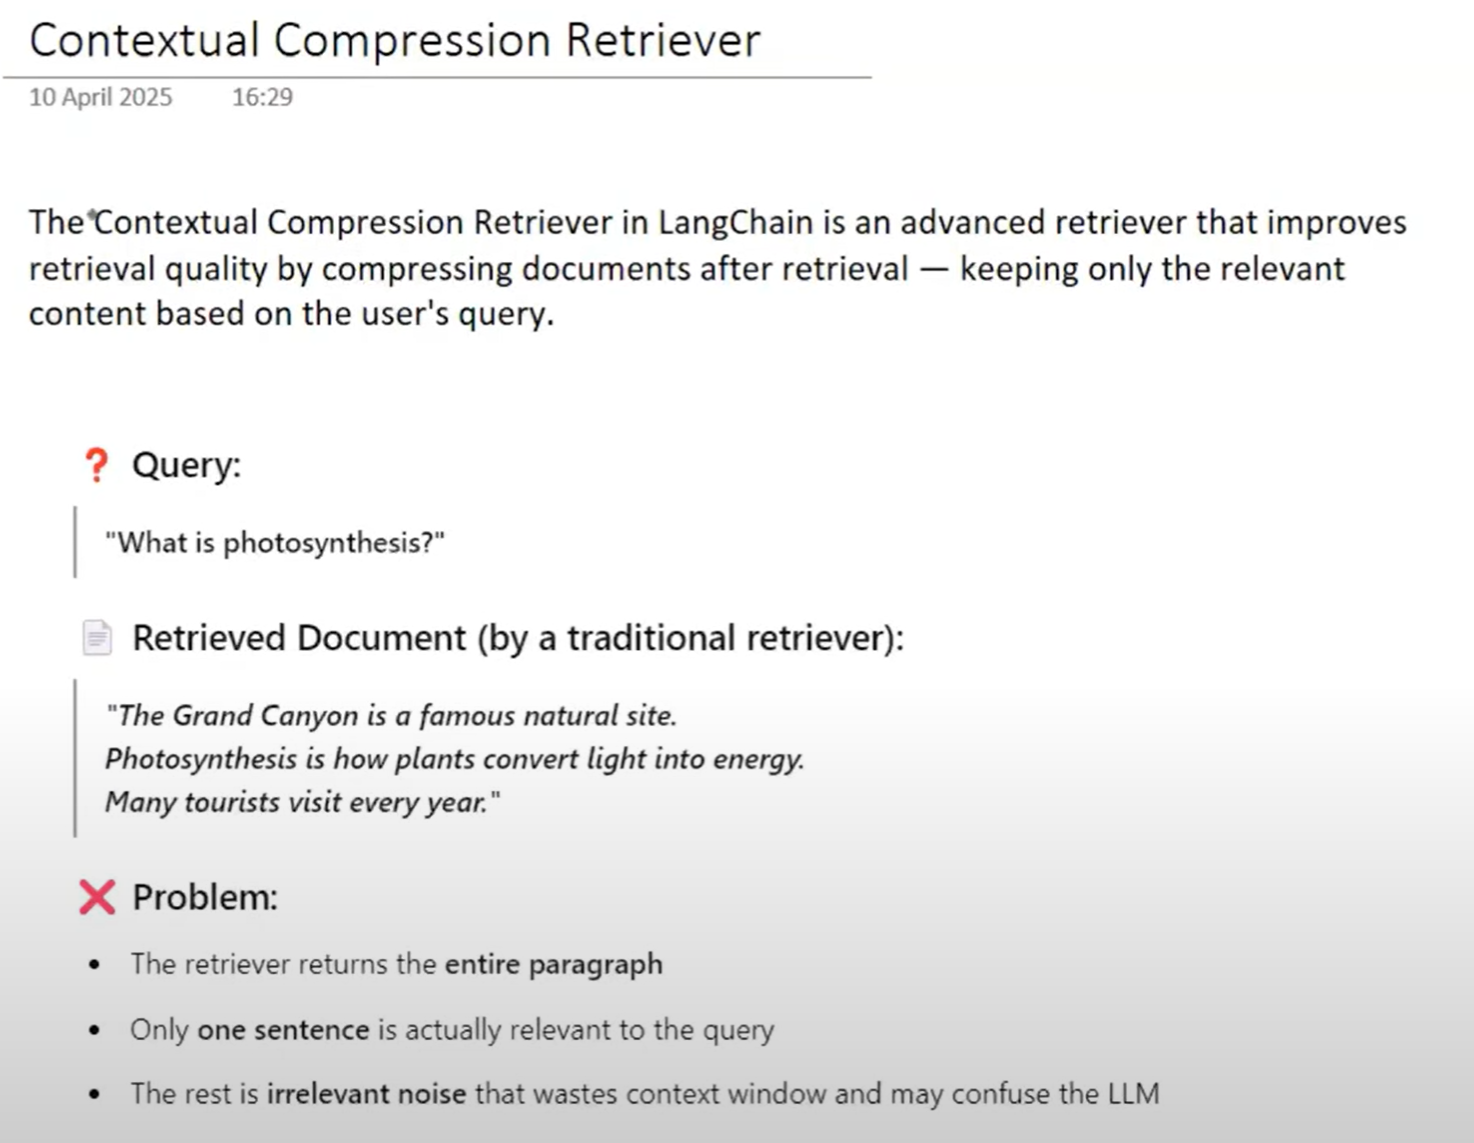

In [83]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

In [87]:
# generate 4 documents with 3 random topics sentences in each of them, but one of the 3 sentences in each document must be about photosynthesis
# the other 2 sentences must be about random topics
# for example, the first document can be about photosynthesis, the second document can be about photosynthesis and global warming, and the third document can be about photosynthesis and AI

documents = [
    Document(page_content="Photosynthesis is the process by which green plants and some other organisms use sunlight to synthesize foods with the help of chlorophyll. It is a crucial process for life on Earth. In addition, the study of AI has gained significant traction in recent years."),
    Document(page_content="Photosynthesis is essential for converting solar energy into chemical energy. It plays a vital role in the carbon cycle. Furthermore, global warming is a pressing issue that affects our planet."),
    Document(page_content="Photosynthesis occurs in chloroplasts of plant cells. It is responsible for producing oxygen as a byproduct. Moreover, machine learning algorithms are transforming various industries."),
    Document(page_content="Photosynthesis is the foundation of the food chain. It provides energy for nearly all living organisms. Additionally, climate change poses significant challenges to biodiversity.")
] 

In [ ]:
from langchain_community.vectorstores import Chroma

# Persist directory setup
persist_directory = "chroma_db"  # specify a fresh or valid directory

# Create a new Chroma DB and store documents
vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=embeddings,
    collection_name="photosynthesis",
    persist_directory=persist_directory  # make sure this directory exists or will be created
)

In [90]:
base_retriever = vectorstore.as_retriever(search_kwargs={"k": 5})


In [91]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
compressor = LLMChainExtractor.from_llm(llm)

In [92]:
compression_retriever = ContextualCompressionRetriever(
    base_retriever=base_retriever,
    base_compressor=compressor
)

In [93]:
query = "waht is photosynthesis?"
compression_retriever.invoke(query)

[Document(metadata={}, page_content='Photosynthesis is the process by which green plants and some other organisms use sunlight to synthesize foods with the help of chlorophyll.'),
 Document(metadata={}, page_content='Photosynthesis is essential for converting solar energy into chemical energy.'),
 Document(metadata={}, page_content='Photosynthesis occurs in chloroplasts of plant cells.'),
 Document(metadata={}, page_content='Photosynthesis is the foundation of the food chain. It provides energy for nearly all living organisms.')]